In [1]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Get data from John Hopkins CSSE Git Repository
# Rerun this daily to get updated statistics

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recover = pd.read_csv(url, error_bad_lines=False)

# Frequently updated local data source 
url = 'https://raw.githubusercontent.com/digitalhumanitarians/COVID-19LK/master/time_series-covid-19-Confirmed.csv'
lk_confirmed = pd.read_csv(url, error_bad_lines=False)

In [2]:
# check for last availble date => Maryland is 9:30 hrs behind local time
last_date=confirmed.columns[confirmed.columns.size-1]
print(last_date)

3/22/20


In [3]:
# sum over countries
confirmedcountry=confirmed.groupby("Country/Region", as_index=False).sum() 

In [4]:
# order by cases
# get top 10 countries => using first column as index
ccs=confirmedcountry.sort_values(by=last_date, ascending=False).head(10)
print('Confirmed Cases') 

print(ccs[['Country/Region',last_date]].to_string(index=False))

Confirmed Cases
 Country/Region  3/22/20
          China    81397
          Italy    59138
             US    33272
          Spain    28768
        Germany    24873
           Iran    21638
         France    16176
   Korea, South     8897
    Switzerland     7245
 United Kingdom     5741


In [5]:
ccs.head(10)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
33,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,80945,80977,81003,81033,81058,81102,81156,81250,81305,81397
81,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138
160,US,9531.0034,-22951.8209,1,1,2,2,5,5,5,...,2179,2727,3499,4632,6421,7783,13677,19100,25489,33272
145,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768
63,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873
77,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,11364,12729,13938,14991,16169,17361,18407,19644,20610,21638
59,France,29.8357,177.0593,0,0,2,3,3,3,4,...,3678,4487,4523,6668,7699,9105,10947,12726,14431,16176
87,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,4,...,7979,8086,8162,8236,8320,8413,8565,8652,8799,8897
150,Switzerland,46.8182,8.2275,0,0,0,0,0,0,0,...,1139,1359,2200,2200,2700,3028,4075,5294,6575,7245
164,United Kingdom,263.4909,-223.8946,0,0,0,0,0,0,0,...,802,1144,1145,1551,1960,2642,2716,4014,5067,5741


In [6]:
# sum of the deaths over countries
deathcountry=death.groupby("Country/Region", as_index=False).sum()

In [7]:
# sum of the recoveries over countries
recovercountry=recover.groupby("Country/Region", as_index=False).sum()

In [8]:
# order by cases 
# get top 10 countries => using first column as index
dcs=deathcountry.sort_values(by=last_date, ascending=False).head(10)
print('Deaths')

print(dcs[['Country/Region',last_date]].to_string(index=False)) 

Deaths
 Country/Region  3/22/20
          Italy     5476
          China     3265
          Spain     1772
           Iran     1685
         France      674
             US      417
 United Kingdom      282
    Netherlands      180
   Korea, South      104
    Switzerland       98


In [9]:
# order by recoveries 
# get top 10 countries => using first column as index
rcs=recovercountry.sort_values(by=last_date, ascending=False).head(10)
print("Recoveries")

print(rcs[["Country/Region", last_date]].to_string(index=False))

Recoveries
Country/Region  3/22/20
         China    72362
          Iran     7931
         Italy     7024
  Korea, South     2909
         Spain     2575
        France     2206
   Cruise Ship      325
       Germany      266
       Belgium      263
         Japan      235


In [10]:
# top 10 countries by cases
countries=ccs['Country/Region'].values
print(countries)

['China' 'Italy' 'US' 'Spain' 'Germany' 'Iran' 'France' 'Korea, South'
 'Switzerland' 'United Kingdom']


In [11]:
# top 10 countries by deaths
dcountries=dcs['Country/Region'].values
print(dcountries)

['Italy' 'China' 'Spain' 'Iran' 'France' 'US' 'United Kingdom'
 'Netherlands' 'Korea, South' 'Switzerland']


In [12]:
# top 10 countries by recoveries
rcountries=rcs["Country/Region"].values
print(rcountries)

['China' 'Iran' 'Italy' 'Korea, South' 'Spain' 'France' 'Cruise Ship'
 'Germany' 'Belgium' 'Japan']


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


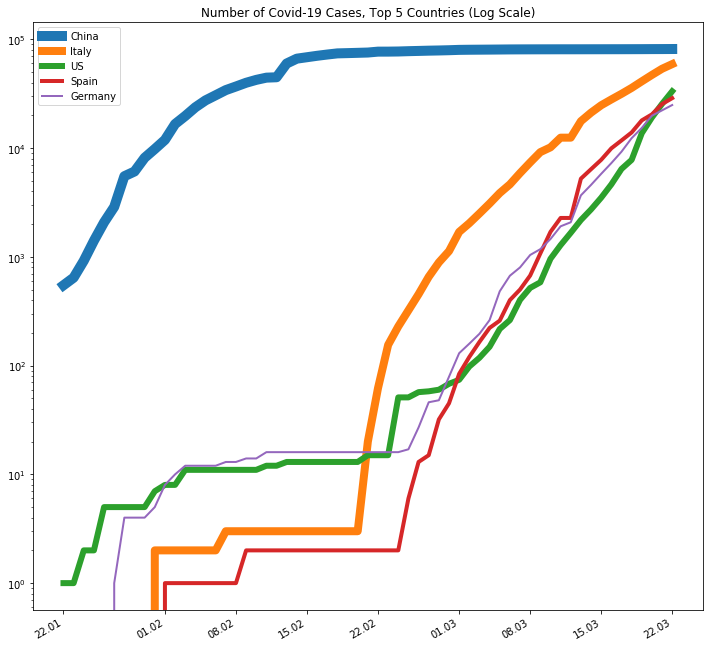

In [13]:
# top 5 countries by number of confirmed cases => Log scale
zerodate = datetime.datetime(2020, 1, 22) # => change this if when running local data
d = confirmed.columns.size-4
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[0:5]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Cases, Top 5 Countries (Log Scale)')
    i=i+1
plt.show()

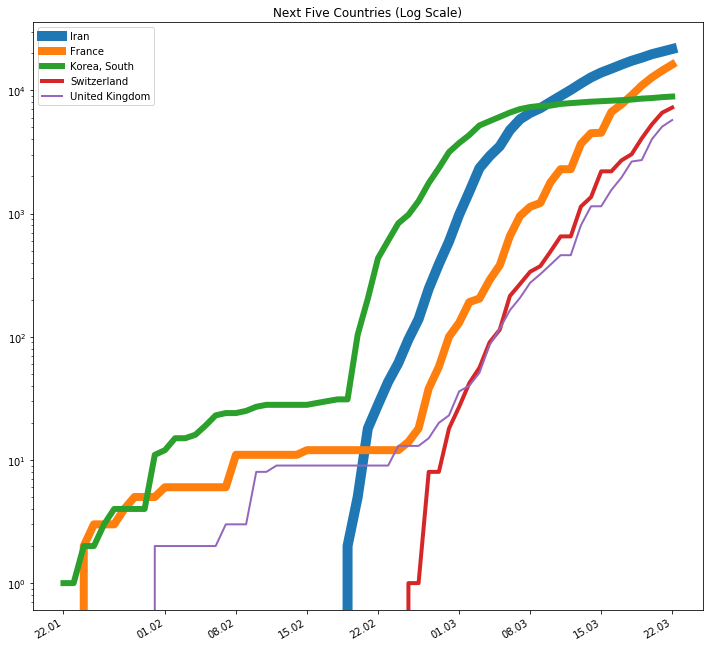

In [14]:
# next 5 countries by number of confirmed cases (5-10) => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[5:10]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Next Five Countries (Log Scale)')
    i=i+1
plt.show()

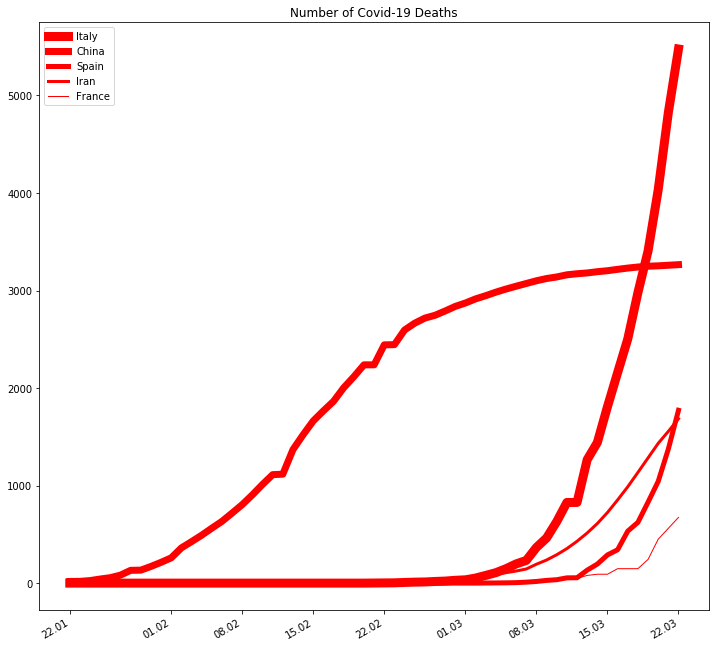

In [15]:
# top 5 countries by number of deaths => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in dcountries[0:5]:
    scdata=dcs.loc[dcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='red')
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Deaths')
    i=i+1
plt.show()

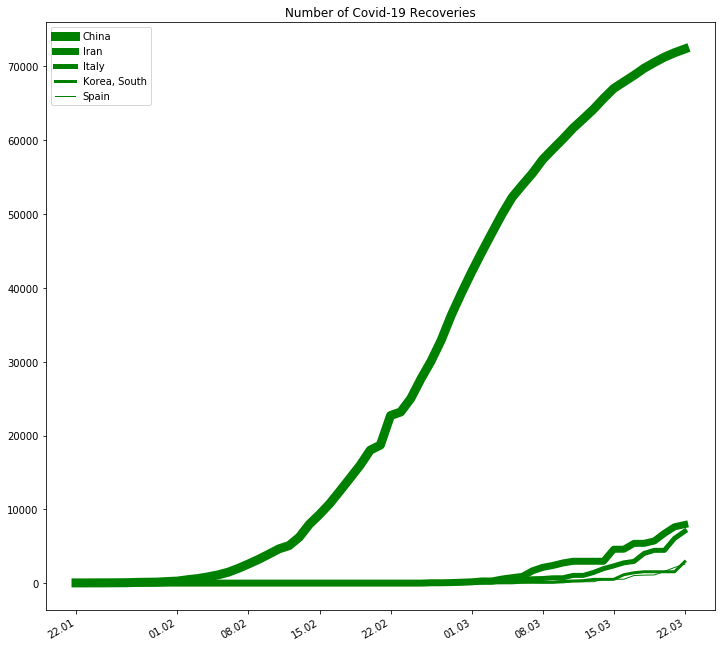

In [16]:
# top 5 countries by number of recoveries => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in rcountries[0:5]:
    scdata=rcs.loc[rcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='green')
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Recoveries')
    i=i+1
plt.show()

In [17]:
# cases in Sri Lanka
sldata=confirmed.loc[confirmed['Country/Region']=='Sri Lanka'].values[:,4:][0]
print(sldata)

# updated cases from local source
# sldata = lk_confirmed.loc[lk_confirmed['Location']=='IDH'].values[:,1:][0]
# print(sldata)

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 6 10 18 28 44 51 60 73 77 82]


In [33]:
# regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

LR = LinearRegression()
d = np.arange(sldata.size).reshape(-1,1)

# degree => 7 
quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(d)

LR.fit(X_quad, sldata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# next 14 days forecast
from sklearn.metrics import r2_score

d_fit = np.arange(0, sldata.size+14)[:, np.newaxis]
y_poly_fit = LR.predict(quad.fit_transform(d_fit))
quad_r2 = r2_score(sldata, LR.predict(X_quad))

# coefficiants of the regression polynomial
print(LR.coef_)

# R^2 score
print("\nR^2 =", quad_r2)

[ 0.         -1.78740037  0.04048893]

R^2 = 0.6622663423291157


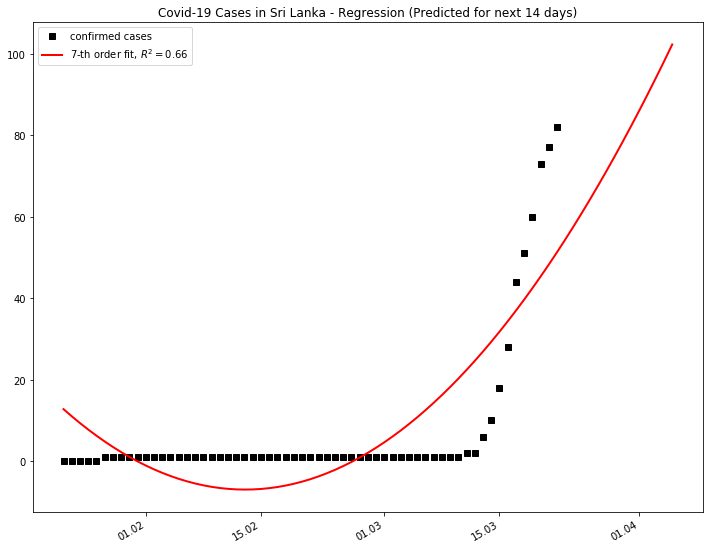

In [35]:
# plot regression for next 14 days

date = [zerodate + datetime.timedelta(days=i) for i in range(len(d_fit))]
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.plot(date0,sldata,'s',color='black',label='confirmed cases')
ax.plot(date, y_poly_fit,label='$7$-th order fit, $R^2=%.2f$' % quad_r2, linestyle='-', color='red', linewidth=2)
ax.legend(loc='upper left')
ax.set_title('Covid-19 Cases in Sri Lanka - Regression (Predicted for next 14 days)')
myFmt = DateFormatter("%d.%m")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.show()